In [131]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
    !pip install -q -U tfx==0.21.2
    print("You can safely ignore the package incompatibility errors.")
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "../../oxdata/2019-01-10-14-36-48-radar-oxford-10k-partial/radar/data"
CHAPTER_ID = "CART"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, CHAPTER_ID)
print(IMAGES_PATH)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

../../oxdata/2019-01-10-14-36-48-radar-oxford-10k-partial/radar/data/CART


In [97]:

for item in dataset:
    print(item)
dataset = dataset.repeat(3).batch(5)
for item in dataset:
    print(item)

tf.Tensor(
[[0 1 2 3 4]
 [5 6 7 8 9]
 [0 1 2 3 4]
 [5 6 7 8 9]
 [0 1 2 3 4]], shape=(5, 5), dtype=int64)
tf.Tensor(
[[5 6 7 8 9]
 [0 1 2 3 4]
 [5 6 7 8 9]
 [0 1 2 3 4]
 [5 6 7 8 9]], shape=(5, 5), dtype=int64)
tf.Tensor(
[[0 1 2 3 4]
 [5 6 7 8 9]
 [0 1 2 3 4]
 [5 6 7 8 9]
 [0 1 2 3 4]], shape=(5, 5), dtype=int64)
tf.Tensor(
[[5 6 7 8 9]
 [0 1 2 3 4]
 [5 6 7 8 9]], shape=(3, 5), dtype=int64)


InvalidArgumentError: Cannot batch tensors with different shapes in component 0. First element had shape [5,5] and element 3 had shape [3,5].

In [98]:
filepath_dataset = tf.data.Dataset.list_files(IMAGES_PATH+"/*",seed=42)

In [99]:
filepath_dataset
for item in filepath_dataset:
    print(item)
filepath_dataset = filepath_dataset.repeat(5).batch(5)
for item in filepath_dataset:
    print(item)

tf.Tensor(b'../../oxdata/2019-01-10-14-36-48-radar-oxford-10k-partial/radar/CART/1547131053847921.png', shape=(), dtype=string)
tf.Tensor(b'../../oxdata/2019-01-10-14-36-48-radar-oxford-10k-partial/radar/CART/1547131056853865.png', shape=(), dtype=string)
tf.Tensor(b'../../oxdata/2019-01-10-14-36-48-radar-oxford-10k-partial/radar/CART/1547131052854808.png', shape=(), dtype=string)
tf.Tensor(b'../../oxdata/2019-01-10-14-36-48-radar-oxford-10k-partial/radar/CART/1547131057105415.png', shape=(), dtype=string)
tf.Tensor(b'../../oxdata/2019-01-10-14-36-48-radar-oxford-10k-partial/radar/CART/1547131056602652.png', shape=(), dtype=string)
tf.Tensor(b'../../oxdata/2019-01-10-14-36-48-radar-oxford-10k-partial/radar/CART/1547131050101138.png', shape=(), dtype=string)
tf.Tensor(b'../../oxdata/2019-01-10-14-36-48-radar-oxford-10k-partial/radar/CART/1547131054346009.png', shape=(), dtype=string)
tf.Tensor(b'../../oxdata/2019-01-10-14-36-48-radar-oxford-10k-partial/radar/CART/1547131057607203.png', 

In [155]:

labels = os.listdir(IMAGES_PATH)
train_dataset = tf.keras.preprocessing.image_dataset_from_directory("../../oxdata/2019-01-10-14-36-48-radar-oxford-10k-partial/radar/data",batch_size=10,shuffle=32,labels=labels,color_mode="grayscale")


Found 51 files belonging to 1 classes.


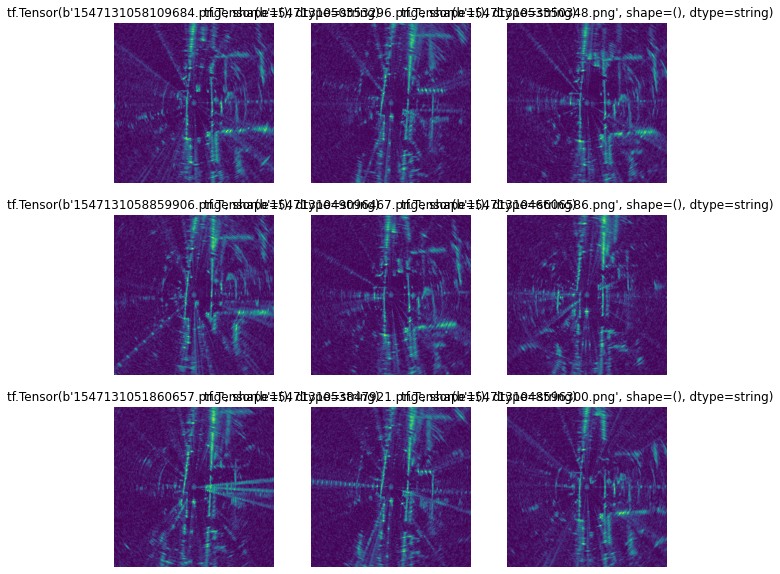

In [159]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(labels[i])
    plt.axis("off")
